In [28]:
import pandas as pd
from datetime import datetime
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [29]:
data = pd.read_csv('cleaned_data.csv')

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136382 entries, 0 to 136381
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   listing_id              136382 non-null  int64  
 1   review_date             136382 non-null  object 
 2   reviewer_id             136382 non-null  int64  
 3   comments                136382 non-null  object 
 4   neighbourhood_cleansed  136382 non-null  object 
 5   price                   136382 non-null  float64
 6   latitude                136382 non-null  float64
 7   longitude               136382 non-null  float64
 8   room_type               136382 non-null  object 
 9   number_of_reviews       136382 non-null  int64  
 10  review_scores_rating    136382 non-null  float64
dtypes: float64(4), int64(3), object(4)
memory usage: 11.4+ MB


In [32]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 7.6 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993225 sha256=fc1586bcd545f31f3d19d2f85756c9dda2f4cd0a76e138317d85511bb1509b86
  Stored in directory: /Users/jinkehan/Library/Caches/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect


In [34]:
import pandas as pd
from langdetect import detect, LangDetectException
#define a function to check the language version
def detect_language_safe(text):
    try:
        return detect(text)
    except LangDetectException:
        return None 


data['language'] = data['comments'].apply(detect_language_safe)


non_english_comments_count = data[data['language'] != 'en'].shape[0]

print(f"The number of not English version reviews is: {non_english_comments_count}")


The number of not English version reviews is: 8412


## Data Cleaning and Tokenize

In [15]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
data['comments'] = data['comments'].str.lower()
data['comments'] = data['comments'].str.replace(r"[^\w\s']", '')
data['comments'] = data['comments'].str.replace(r'\d+', '', regex=True)
data['comments'] = data['comments'].str.replace(r'\s+', ' ', regex=True)
data['comments'] =data['comments'].str.strip()

def remove_stopwords(sent):
    stop_word = set(stopwords.words('english'))
    words = word_tokenize(sent)
    filter_word = [x for x in words if x not in stop_word and len(x)>2]
    return filter_word

data['comments'] = data['comments'].apply(remove_stopwords)

[nltk_data] Downloading package punkt to /Users/jinkehan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jinkehan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
comments = data['comments']
#comments

In [35]:
list_doc = comments.tolist()
#list_doc

Let's train_test_split now.

In [ ]:
from sklearn.model_selection import train_test_split

#train_comments is used for set model
#test_comments is used for evaluate model

train_comments, test_comments = train_test_split(list_doc, test_size=0.2, random_state=42)


## Topic Analysis

Use topic numbers 3, 6, 9, 12, 15 respectively and print out all topics with 5 words.

For this We will use gensim to train an LDA model. gensim requires the following steps:

Construct a gensim.corpora.dictionary from the dataset Construct a gensim "corpus" using this dictionary, by mapping each word to an index in the dictionary Run LDA on this corpus

In [18]:
from gensim import corpora
dictionary_train = corpora.Dictionary(train_comments)
corpus_train = [dictionary_train.doc2bow(doc) for doc in train_comments]

The function below prints the top num words in each topic for a given model.

In [19]:
def print_topic_words(model,num):
    """ print top words in model topics.

    Args:
        model: LDA model

    Returns:
        none
    """
    for topic in range(model.num_topics):
        top_words = model.show_topic(topic, num)
        words = ", ".join([word[0] for word in top_words])
        print(f"Topic {topic}: {words}")

The following function builds multiple LDA models with number of topics specified in the list num_topics.

In [20]:
def build_num_topic_model(dictionary_train, corpus_train, num_topics):
    """ Build lda model with given parameters, use print_topic_words to print words

    Args:
        dictionary: dictionary built from dataset
        corpus: corpus built from dataset
        num_topics: list of numbers

    Returns:
        none
    """
    for num_topic in num_topics:
        lda_model = models.ldamodel.LdaModel(corpus_train, num_topics=num_topic, id2word=dictionary_train)
        print(f"LDA model with {num_topic} topics:")
        print_topic_words(lda_model,5)
        print("\n")

In [21]:
from gensim import models
build_num_topic_model(dictionary_train, corpus_train, [3, 6, 9, 12, 15])

LDA model with 3 topics:
Topic 0: room, place, stay, clean, would
Topic 1: great, stay, place, clean, location
Topic 2: boston, stay, place, great, location


LDA model with 6 topics:
Topic 0: muy, que, dan, para, con
Topic 1: boston, walk, great, restaurants, close
Topic 2: room, place, bathroom, good, would
Topic 3: stay, home, place, boston, host
Topic 4: très, est, pour, nous, dans
Topic 5: great, stay, place, location, clean


LDA model with 9 topics:
Topic 0: stay, place, clean, would, recommend
Topic 1: boston, easy, great, location, place
Topic 2: kitchen, apartment, parking, space, well
Topic 3: check, host, stay, time, airbnb
Topic 4: line, très, station, est, walk
Topic 5: und, die, sehr, propre, ist
Topic 6: great, location, place, stay, clean
Topic 7: room, good, bathroom, place, night
Topic 8: muy, que, dan, best, para


LDA model with 12 topics:
Topic 0: host, stay, place, questions, time
Topic 1: kitchen, apartment, nice, comfortable, street
Topic 2: walking, restaurant

## Model Evaluation

The code below trains topic models with different numbers of topics and measures their coherence and perplexity.

In [22]:
# perplexity
# run different number of topics to get perplexity and coherence value for this model
from gensim.models.coherencemodel import CoherenceModel
dictionary_test = corpora.Dictionary(test_comments)
corpus_test = [dictionary.doc2bow(doc) for doc in test_comments]

def get_measurement_for_model(dictionary_test, corpus_test, topic_nums):
    """ Build lda model with given parameters

    Args:
        dictionary: dictionary built from dataset
        corpus: corpus built from dataset
        topic_nums: a list contains all possible topic number

    Returns:
        2 lists: one of perplexities, and one of coherence value
    """
    perplexity = []
    coherence_value=[]
    for num_topic in topic_nums:
        lda_model = models.ldamodel.LdaModel(corpus_test, num_topics=num_topic, id2word=dictionary_test)
        cohm = CoherenceModel(model=lda_model, corpus=corpus_test, coherence='u_mass')
        coherence_value.append(cohm.get_coherence())
        perplexity.append(lda_model.log_perplexity(corpus_test))

    return perplexity,coherence_value

In [23]:
perplexity, coherence = get_measurement_for_model(dictionary, corpus, [3, 6, 9, 12, 15, 20, 50])

In [24]:
print(perplexity)
print(coherence)

[-7.279256232018252, -7.401988242096622, -7.587114254034628, -8.149824318117341, -8.755567268368452, -9.305596274108236, -12.530116113063677]
[-1.960733327604126, -2.589950003820732, -3.0891349586795913, -3.65601301793671, -4.196177838004669, -3.0459234501811143, -3.9949403881911776]


We can now plot the coherence and perplexity of each model.

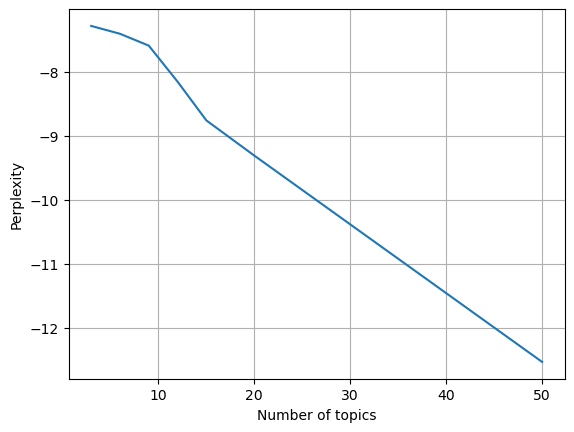

In [25]:
plt.plot([3, 6, 9, 12, 15, 20, 50], perplexity)
plt.grid()
plt.xlabel("Number of topics")
plt.ylabel("Perplexity")
plt.show()

In [26]:
From the above graph what topic number would you choose and why? Is it a good idea to choose the topic number based on perplexity? why or why not?

Object `not` not found.


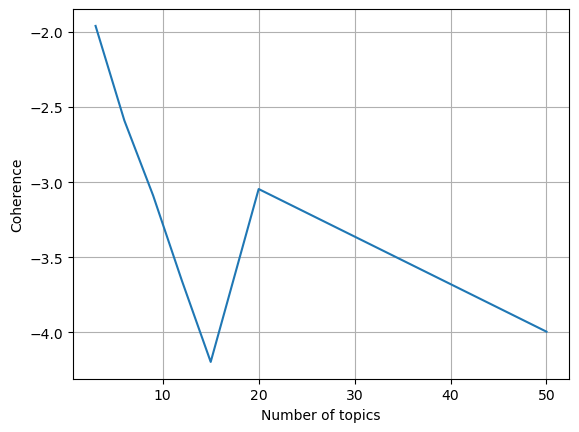

In [27]:
plt.plot([3, 6, 9, 12, 15, 20, 50], coherence)
plt.grid()
plt.xlabel("Number of topics")
plt.ylabel("Coherence")
plt.show()

From the above graph what topic number would you choose and why?